# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

## Importing the dataset

In [ ]:
class_df = pd.read_csv("dataR2.csv")

In [5]:
class_df.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [6]:
class_df.shape

(116, 10)

In [7]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [8]:
class_df.describe().T

count        mean         std        min         25%  \
Age             116.0   57.301724   16.112766  24.000000   45.000000   
BMI             116.0   27.582111    5.020136  18.370000   22.973205   
Glucose         116.0   97.793103   22.525162  60.000000   85.750000   
Insulin         116.0   10.012086   10.067768   2.432000    4.359250   
HOMA            116.0    2.694988    3.642043   0.467409    0.917966   
Leptin          116.0   26.615080   19.183294   4.311000   12.313675   
Adiponectin     116.0   10.180874    6.843341   1.656020    5.474283   
Resistin        116.0   14.725966   12.390646   3.210000    6.881763   
MCP.1           116.0  534.647000  345.912663  45.843000  269.978250   
Classification  116.0    1.551724    0.499475   1.000000    1.000000   

                       50%         75%          max  
Age              56.000000   71.000000    89.000000  
BMI              27.662416   31.241442    38.578759  
Glucose          92.000000  102.000000   201.000000  
Insulin           5.924500   11.189250    58.460000  
HOMA              1.380939    2.857787    25.050342  
Leptin           20.271000   37.378300    90.280000  
Adiponectin       8.352692   11.815970    38.040000  
Resistin         10.827740   17.755207    82.100000  
MCP.1           471.322500  700.085000  1698.440000  
Classification    2.000000    2.000000     2.000000

In [9]:
class_df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [10]:
# Indentification of data COLUMNS
class_df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [11]:
class_df.Classification.unique()

array([1, 2])

In [12]:
class_df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

Text(0, 0.5, 'Count')

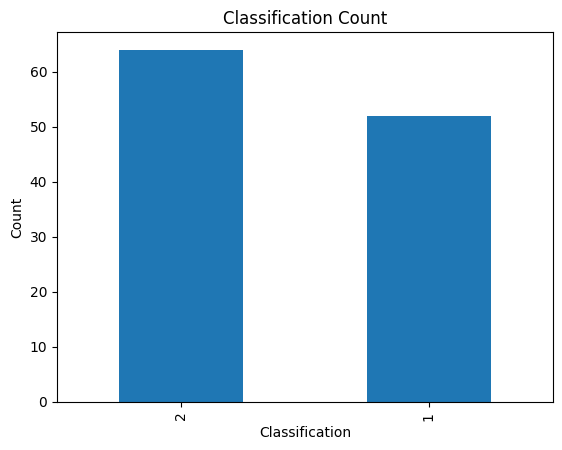

In [13]:
class_df['Classification'].value_counts().plot(kind='bar')
plt.title('Classification Count')
plt.xlabel('Classification')
plt.ylabel('Count')

# Exploratory Data Analysis

In [14]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.6 MB 11.9 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 72.4 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=a990b5ce0f0ea146d4be7dde66ca727b2a1d7882ac4cdca7fdc48abd683aa6cd
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [15]:
from pandas_profiling import ProfileReport
#Generating PandasProfiling Report
EDA = ProfileReport(class_df)
EDA

<ipython-input-15-488ebb03bb06>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

In [16]:
# Changing the class values for proper indentification
class_df['Classification'] = class_df.Classification.map({1:0, 2:1})
class_df

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               0  
1     4.06405  468.786               0  
2     9.27715  554.697               0  
3    12.76600  928.220               0  
4    10.57635  773.920               0  
..        ...      ...             ...  
111  10.96000  268.230               1  
112   7.32000  330.160               1  
113  10.33000  314.050               1  
114   3.27000  392.460               1  
115   4.35000   90.090               1  

[116 rows x 10 columns]

## Outliers

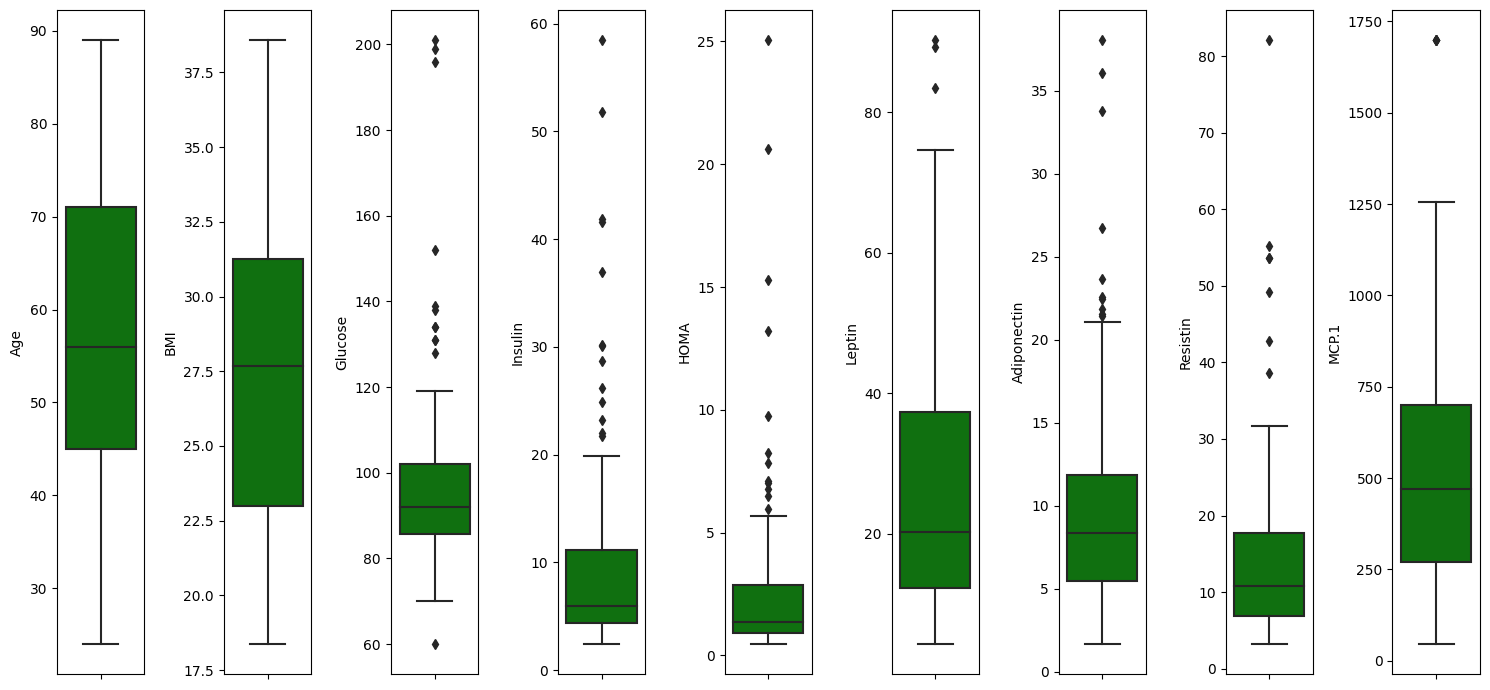

In [17]:
Class_features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(Class_features)):
    plt.subplot(1, len(Class_features), i+1)
    sns.boxplot(y=class_df[Class_features[i]], color='green', orient='v')
    plt.tight_layout()

In [18]:
# Features 
X = class_df.iloc[:, :-1].values
# Target variable
y = class_df.iloc[:, -1].values


## Splitting the dataset into training and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

### Normalization

In [20]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Using the transform method because we don't want to bring in another scaler but to scale the test dataset by the scaler used
# to train the dataset
X_test = scaler.transform(X_test)

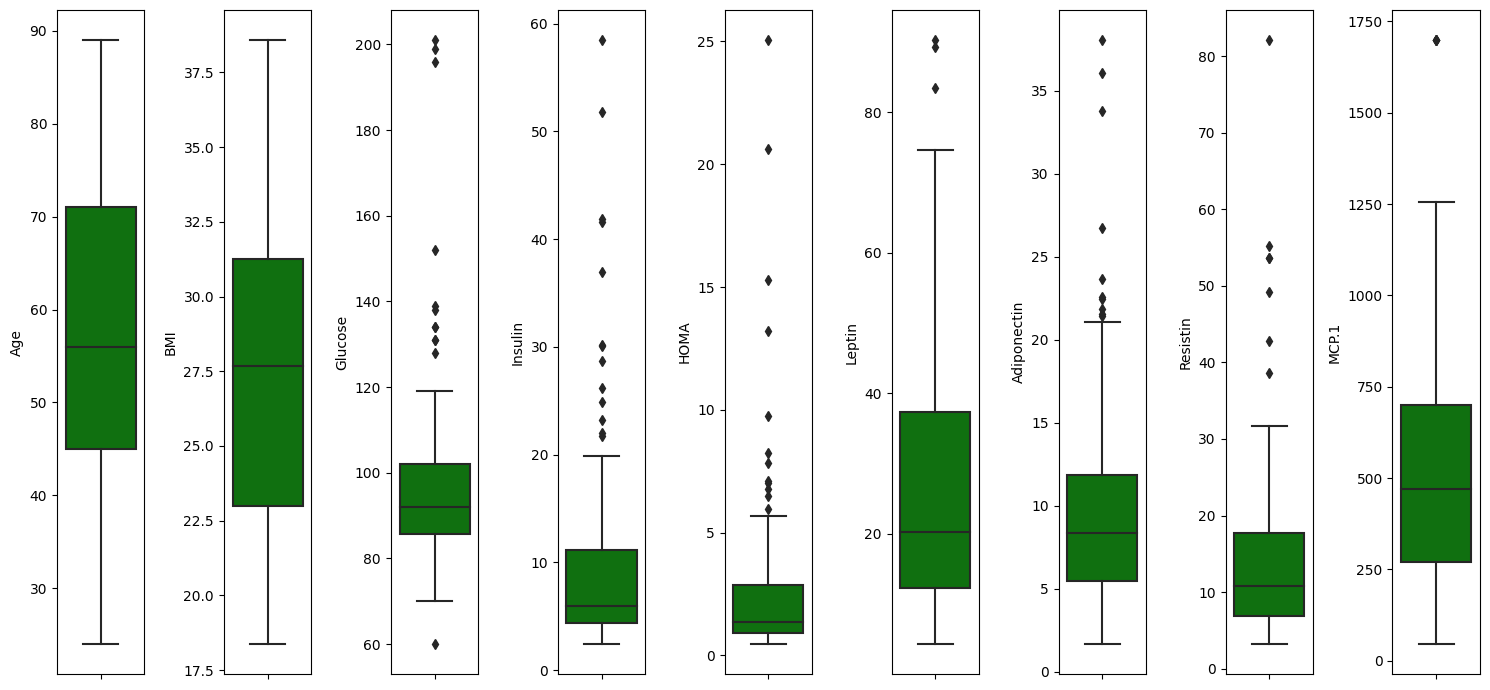

In [21]:
Class_features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(Class_features)):
    plt.subplot(1, len(Class_features), i+1)
    sns.boxplot(y=class_df[Class_features[i]], color='green', orient='v')
    plt.tight_layout()

## Feature Selection

In [22]:
# Used anova for feature selection because the input data from the dataset is numerical while the target variable is categorical
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 5)
selector.fit(X_train, y_train)

SelectKBest(k=5)

In [23]:
selector.scores_

array([ 0.23020879,  3.01603644, 11.86938281,  5.7217285 ,  6.0280599 ,
        0.48100192,  0.01930311,  2.02937078,  0.2194355 ])

In [24]:
columns = selector.get_support(indices = True)
columns

array([1, 2, 3, 4, 7])

In [25]:
SX_train = X_train[:,columns]
SX_test = X_test[:,columns]

In [26]:
SX_train

array([[1.27538939e-01, 1.22137405e-01, 9.14007282e-02, 4.44970231e-02,
        5.61541387e-02],
       [1.31274389e-01, 1.37404580e-01, 1.76340401e-02, 9.55211976e-03,
        1.31195335e-01],
       [9.82965878e-01, 2.36641221e-01, 1.38198758e-01, 8.25915633e-02,
        8.94041070e-02],
       [6.46401391e-01, 1.52671756e-01, 5.54187192e-02, 2.93890503e-02,
        8.85155280e-02],
       [3.13373538e-01, 1.67938931e-01, 3.43881631e-01, 1.79945292e-01,
        1.12249208e-01],
       [7.41795699e-01, 1.06870229e-01, 6.02912829e-02, 2.83548403e-02,
        2.71178857e-01],
       [1.59958450e-01, 6.10687023e-02, 3.71242950e-03, 0.00000000e+00,
        2.50127266e-01],
       [3.85284995e-01, 9.16030534e-02, 6.92510887e-03, 2.54481978e-03,
        7.60552668e-04],
       [5.49784936e-01, 5.34351145e-02, 1.34932534e-02, 3.97562763e-03,
        3.61014070e-01],
       [9.52127746e-01, 2.36641221e-01, 2.33829514e-01, 1.36981357e-01,
        2.42239067e-01],
       [5.83097088e-01, 2.1374

## Resampling

In [27]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1])

<Axes: ylabel='count'>

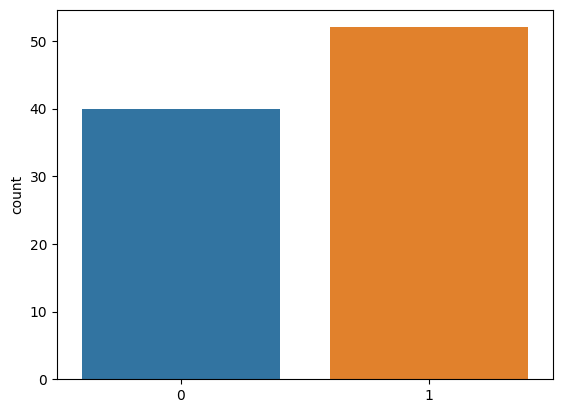

In [28]:
sns.countplot(x = y_train)

In [29]:
SX_train.shape

(92, 5)

In [30]:
y_train.shape

(92,)

In [31]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy = 'minority', random_state = 0)
X_sm_train, y_sm_train = smote.fit_resample(SX_train, y_train)

<Axes: ylabel='count'>

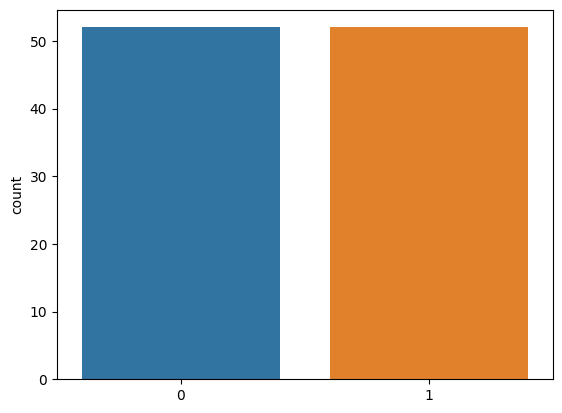

In [32]:
sns.countplot(x = y_sm_train)

# Modelling

# K-Nearest Neighbors 

## Training the K-NN model on the Training Set

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_sm_train, y_sm_train)

KNeighborsClassifier()

## Predicting the Test set results

In [34]:
# Testing the trained KNN model on the test set to compare it's result on the actual classification
y_pred = KNN_classifier.predict(SX_test)
# concatenating all predicted classifications and their respective actual classification into a numpy array
model_comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(model_comparison)

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0]
 [ 2 10]]


0.9166666666666666

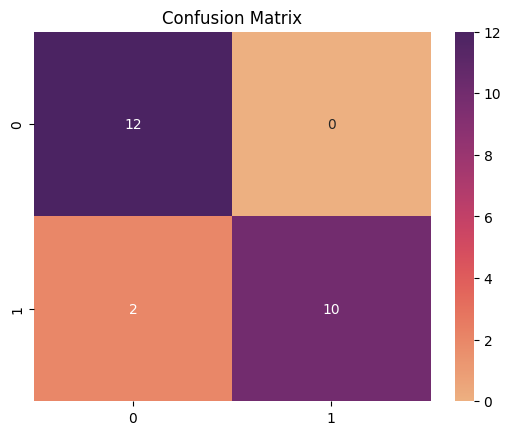

In [36]:
viz = sns.heatmap(cm, cmap = 'flare', annot = True)
plt.title('Confusion Matrix', fontsize = 12)
plt.show()

In [37]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
Total = np.sum(cm)

Accuracy_rate = round((( TP + TN) / Total) * 100, 1)
Error_rate = round((( FP + FN ) / Total) * 100, 1)

print(f"Accuracy Rate: {Accuracy_rate}%")
print("----------------------------")
print(f"Error Rate: {Error_rate}%")

Accuracy Rate: 91.7%
----------------------------
Error Rate: 8.3%


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.83      0.91        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



#  Artificial Neural Network

In [39]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [40]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.12.0'

## Building the ANN

## Initializing the ANN

In [43]:
ann_model = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [44]:
ann_model.add(tf.keras.layers.Dense(units = 5, activation= 'relu'))

## Adding the second hidden layer

In [45]:
ann_model.add(tf.keras.layers.Dense(units = 5, activation= 'relu'))

## Adding the output layer

In [46]:
ann_model.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid'))

# Training the ANN

## Compling the ANN with an optimizer, loss function and a metrics parameter

In [47]:
ann_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = 'accuracy')

## Training the ANN on the Training Set

In [48]:
ann_model.fit(X_sm_train, y_sm_train, batch_size = 10, epochs = 115, verbose = 1)

Epoch 1/115
11/11 [==============================] - 1s 3ms/step - loss: 0.7277 - accuracy: 0.5000
Epoch 2/115
11/11 [==============================] - 0s 4ms/step - loss: 0.7222 - accuracy: 0.5096
Epoch 3/115
11/11 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.4808
Epoch 4/115
11/11 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.4519
Epoch 5/115
11/11 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.4808
Epoch 6/115
11/11 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.4808
Epoch 7/115
11/11 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.4904
Epoch 8/115
11/11 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4904
Epoch 9/115
11/11 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.4808
Epoch 10/115
11/11 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4519
Epoch 11/

# Predicting the Test set results

In [49]:
# Testing the trained ANN model on the test set to compare it's result on the actual classification
y_pred = ann_model.predict(SX_test)
# probability ----- check AZ Machine learning
y_pred = (y_pred > 0.5)
# concatenating all predicted classifications and their respective actual classification into a numpy array
model_comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(model_comparison)

1/1 [==============================] - 0s 277ms/step
[[1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  1]
 [ 3  9]]


0.8333333333333334

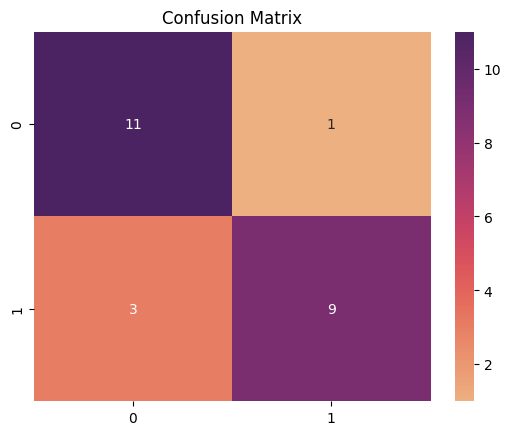

In [51]:
viz = sns.heatmap(cm, cmap = 'flare', annot = True)
plt.title('Confusion Matrix', fontsize = 12)
plt.show()

In [52]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
Total = np.sum(cm)

Accuracy_rate = (( TP + TN) / Total) * 100
Error_rate = (( FP + FN ) / Total) * 100

print(f"Accuracy Rate: {Accuracy_rate}%")
print("----------------------------")
print(f"Error Rate: {Error_rate}%")

Accuracy Rate: 83.33333333333334%
----------------------------
Error Rate: 16.666666666666664%


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24

